<a href="https://colab.research.google.com/github/YanggWendy/FYP-Portfolio-Management-System/blob/main/FYP_2000_2022_Long_1234_new_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'FYP Data/'
assert FOLDERNAME is not None, "[1]Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
!pip install yfinance
!pip install fundamentalanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
PATH = '/content/drive/My Drive/FYP Data/' 

In [ ]:
import yfinance as yf
import pandas as pd
from tqdm.notebook import tqdm
import statistics
import fundamentalanalysis as fa
import datetime
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.models import load_model
import math
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network
from keras.optimizers import SGD

# Get Ticker

In [ ]:
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
data_table[0]
SP500_ticker = data_table[0]['Symbol'].tolist()

#remove invalid stock ticker
SP500_ticker.remove('BRK.B')
SP500_ticker.remove('BF.B')
SP500_ticker.remove('GEHC')
#SP500_ticker.remove('BG')
#SP500_ticker.remove('FICO')
#SP500_ticker.remove('PODD')

In [ ]:
#data = yf.download(SP500_ticker, period='max', interval="1d", group_by='tickers')

[*********************100%***********************]  500 of 500 completed


# Get Technical list & Fundamental data list

In [ ]:
Technical_list = ['Close','Volume','VEMA12','VSTD20','V20','AR','BR','AU','AD']
fundamental_list = ['marketCap', 'peRatio', 'pbRatio', 'evToSales','receivablesTurnover', 'payablesTurnover','debtToAssets', 'inventoryTurnover',
 'roe','revenuePerShare','cashPerShare']

In [ ]:
stock_data = pd.read_csv("drive/My Drive/FYP Data/stock data.csv",index_col = 0,header = [0,1])
stock_data

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2023-01-30  33.580002  33.869999  33.490002  33.660000  33.424152  1951800.0   
2023-01-27  33.930000  34.075001  33.665001  33.849998  33.612820  1518600.0   
2023-01-26  33.540001  34.049999  33.419998  33.959999  33.722050  2239200.0   
2023-01-25  33.259998  34.139999  33.040001  33.490002  33.255348  5308100.0   
...               ...        ...        ...        ...        ...        ...   
1993-02-04        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-03        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-02        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-01        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...   WTW   GWW  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.04  0.36   
2023-01-30  164.000000  165.630005  163.820007  164.699997  ...  0.08  0.40   
2023-01-27  166.979996  167.690002  164.500000  165.179993  ...  0.04  0.44   
2023-01-26  166.869995  168.300003  166.119995  168.240005  ...  0.04  0.48   
2023-01-25  165.440002  166.720001  163.779999  165.509995  ...  0.04  0.52   
...                ...         ...         ...         ...  ...   ...   ...   
1993-02-04         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-03         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-02         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-01         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-01-29         NaN         NaN         NaN         NaN  ...  0.00  0.00   

            WYNN   XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
              AD    AD    AD    AD    AD    AD    AD    AD  
Date                                                        
2023-01-31  0.20  0.76  0.80  0.28  0.04  0.72  0.04  0.40  
2023-01-30  0.24  0.80  0.84  0.32  0.08  0.76  0.08  0.44  
2023-01-27  0.28  0.84  0.88  0.36  0.12  0.80  0.04  0.04  
2023-01-26  0.32  0.88  0.92  0.40  0.16  0.84  0.04  0.08  
2023-01-25  0.36  0.92  0.96  0.44  0.20  0.88  0.08  0.12  
...          ...   ...   ...   ...   ...   ...   ...   ...  
1993-02-04  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-03  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-02  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-01  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-01-29  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

[7556 rows x 6500 columns]

# Add stock selection label

In [ ]:
SP500_final = pd.read_csv("drive/My Drive/FYP Data/sp500 data final.csv",index_col = 0,header = [0,1])
SP500_final = SP500_final.drop(index='2023-01-31')

SP500_final

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
...               ...        ...        ...        ...        ...        ...   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...  \
                  Open        High         Low       Close  ...   
Date                                                        ...   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...   
...                ...         ...         ...         ...  ...   
1993-05-28         NaN         NaN         NaN         NaN  ...   
1993-04-30         NaN         NaN         NaN         NaN  ...   
1993-03-31         NaN         NaN         NaN         NaN  ...   
1993-02-26         NaN         NaN         NaN         NaN  ...   
1993-01-29         NaN         NaN         NaN         NaN  ...   

                                WTW                      GWW  \
           excessive monthly return excessive monthly return   
Date                                                           
2022-12-30                -0.086483                -0.066035   
2022-11-30                 0.117453                 0.046251   
2022-10-31                 0.016905                -0.079165   
2022-09-30                -0.076605                 0.031974   
2022-08-31                 0.163840                 0.073836   
...                             ...                      ...   
1993-05-28                      NaN                -0.024339   
1993-04-30                      NaN                -0.015399   
1993-03-31                      NaN                 0.084719   
1993-02-26                      NaN                 0.046446   
1993-01-29                      NaN                -0.068853   

                               WYNN                      XEL  \
           excessive monthly return excessive monthly return   
Date                                                           
2022-12-30                 0.130925                -0.144888   
2022-11-30                 0.109647                 0.122305   
2022-10-31                 0.198050                -0.032700   
2022-09-30                -0.148748                -0.145207   
2022-08-31                 0.232588                 0.054270   
...                             ...                      ...   
1993-05-28                      NaN                 0.046571   
1993-04-30                      NaN                -0.081487   
1993-03-31                      NaN                 0.024366   
1993-02-26                      NaN                -0.037860   
1993-01-29                      NaN                 0.041163   

                                XYL                      YUM  \
           excessive monthly return excessive monthly return   
Date                               

In [ ]:
er_return = pd.DataFrame()
for ticker in tqdm(SP500_ticker):
  er_return[ticker] = SP500_final[ticker,"excessive monthly return"].tolist()

er_return.index = SP500_final.index
er_return[np.isnan(er_return)] = -100
er_return

  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-13-b57bcc10e4b1>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  er_return[ticker] = SP500_final[ticker,"excessive monthly return"].tolist()
<ipython-input-13-b57bcc10e4b1>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  er_return[ticker] = SP500_final[ticker,"excessive monthly return"].tolist()
<ipython-input-13-b57bcc10e4b1>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,-0.166135,0.056965,-0.118852,-0.211537,-0.080017,-0.125514,-0.233475,-0.025308,-0.180409,-0.090068,...,-0.086483,-0.066035,0.130925,-0.144888,-0.185104,-0.106802,0.107328,-0.127030,-0.044408,0.003464
2022-11-30,0.075844,0.066249,0.144415,0.126540,0.010590,0.159031,0.076179,0.099519,0.028165,0.097645,...,0.117453,0.046251,0.109647,0.122305,0.108028,0.119364,0.072555,0.185487,0.072540,0.074631
2022-10-31,-0.109752,-0.002384,-0.023857,-0.010227,-0.051197,-0.095386,-0.105821,-0.028200,-0.018341,-0.316164,...,0.016905,-0.079165,0.198050,-0.032700,-0.014336,-0.023149,-0.156872,-0.051633,-0.113493,-0.088899
2022-09-30,-0.024180,-0.034927,-0.140021,-0.071723,-0.059170,-0.183267,0.042918,-0.005211,-0.093980,0.052237,...,-0.076605,0.031974,-0.148748,-0.145207,0.009953,-0.050552,-0.081600,-0.078381,-0.141316,-0.145760
2022-08-31,0.080938,0.052902,0.134938,0.190458,0.084296,0.139444,0.107666,-0.070750,0.117771,0.119381,...,0.163840,0.073836,0.232588,0.054270,0.151264,0.148269,0.060936,0.175670,0.116541,0.139676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-05-28,-0.036279,0.014785,-0.048389,-100.000000,-100.000000,-100.000000,-0.003560,-0.057483,-0.003398,-100.000000,...,-100.000000,-0.024339,-100.000000,0.046571,-100.000000,-100.000000,0.130199,-100.000000,-0.046344,-100.000000
1993-04-30,-0.039332,0.144174,-0.080845,-100.000000,-100.000000,-100.000000,-0.098939,0.098899,-0.069167,-100.000000,...,-100.000000,-0.015399,-100.000000,-0.081487,-100.000000,-100.000000,0.152673,-100.000000,-0.053939,-100.000000
1993-03-31,0.067157,-0.042842,0.133700,-100.000000,-100.000000,-100.000000,0.022049,0.382571,-0.006241,-100.000000,...,-100.000000,0.084719,-100.000000,0.024366,-100.000000,-100.000000,0.214637,-100.000000,-0.068616,-100.000000


In [ ]:
er_return.to_csv("drive/My Drive/FYP Data/er_return.csv",index=True, header=True )

In [ ]:
er_return = er_return[:-84]

In [ ]:
#get top25% data

#get index of top25% excessive return stock
er_return_index = np.argsort(-er_return.values, axis=1)[:,:126]

#get name of top25% excessive return stock
top_stock_name = []
count = 0
for index in er_return_index:
  stock_list = []
  for stock_i in index:
    if er_return[SP500_ticker[stock_i]][count] != -100:
      stock_list.append(SP500_ticker[stock_i])
    else:
      print(er_return[SP500_ticker[stock_i]][count])
  count = count + 1
  top_stock_name.append(stock_list)
np.array(top_stock_name).shape

(276, 126)

In [ ]:
#get middle 25% data

#get index of middle 25% excessive return stock
er_return_index = np.argsort(-er_return.values, axis=1)[:,126:252]

#get name of middle25% excessive return stock
middle_stock_name = []
count = 0
for index in er_return_index:
  stock_list = []
  for stock_i in index:
    if er_return[SP500_ticker[stock_i]][count] != -100:
      stock_list.append(SP500_ticker[stock_i])
    else:
      print(er_return[SP500_ticker[stock_i]][count])
  count = count + 1
  middle_stock_name.append(stock_list)
np.array(middle_stock_name).shape

(276, 126)

In [ ]:
#get top 25% data

#get index of top 25% excessive return stock
er_return_index = np.argsort(-er_return.values, axis=1)[:,252:370]

#get name of top25% excessive return stock
stock_name = []
count = 0
for index in er_return_index:
  stock_list = []
  for stock_i in index:
    if er_return[SP500_ticker[stock_i]][count] != -100:
      stock_list.append(SP500_ticker[stock_i])
    else:
      print(er_return[SP500_ticker[stock_i]][count])
  stock_name.append(stock_list)
  count = count + 1
np.array(stock_name).shape

-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0


<ipython-input-17-1491e9f095f2>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(stock_name).shape


(276,)

In [ ]:
SP500_final = SP500_final[:-84]
SP500_final

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
...               ...        ...        ...        ...        ...        ...   
2000-05-31        NaN        NaN        NaN        NaN        NaN        NaN   
2000-04-28        NaN        NaN        NaN        NaN        NaN        NaN   
2000-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
2000-02-29        NaN        NaN        NaN        NaN        NaN        NaN   
2000-01-31        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...  \
                  Open        High         Low       Close  ...   
Date                                                        ...   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...   
...                ...         ...         ...         ...  ...   
2000-05-31         NaN         NaN         NaN         NaN  ...   
2000-04-28         NaN         NaN         NaN         NaN  ...   
2000-03-31         NaN         NaN         NaN         NaN  ...   
2000-02-29         NaN         NaN         NaN         NaN  ...   
2000-01-31         NaN         NaN         NaN         NaN  ...   

                                WTW                      GWW  \
           excessive monthly return excessive monthly return   
Date                                                           
2022-12-30                -0.086483                -0.066035   
2022-11-30                 0.117453                 0.046251   
2022-10-31                 0.016905                -0.079165   
2022-09-30                -0.076605                 0.031974   
2022-08-31                 0.163840                 0.073836   
...                             ...                      ...   
2000-05-31                      NaN                -0.263055   
2000-04-28                      NaN                -0.047806   
2000-03-31                      NaN                -0.130220   
2000-02-29                      NaN                 0.078886   
2000-01-31                      NaN                -0.076458   

                               WYNN                      XEL  \
           excessive monthly return excessive monthly return   
Date                                                           
2022-12-30                 0.130925                -0.144888   
2022-11-30                 0.109647                 0.122305   
2022-10-31                 0.198050                -0.032700   
2022-09-30                -0.148748                -0.145207   
2022-08-31                 0.232588                 0.054270   
...                             ...                      ...   
2000-05-31                      NaN                -0.122144   
2000-04-28                      NaN                 0.045772   
2000-03-31                      NaN                 0.167725   
2000-02-29                      NaN                -0.056595   
2000-01-31                      NaN                -0.057210   

                                XYL                      YUM  \
           excessive monthly return excessive monthly return   
Date                               

In [ ]:
#add label
for ticker in tqdm(SP500_ticker):
  label = []
  for i in range(0,276):
    if ticker in top_stock_name[i]:
      label.append(3)
    elif ticker in middle_stock_name[i]:
      label.append(2)
    elif ticker in stock_name[i]:
      label.append(1)
    else:
      label.append(0)
  SP500_final[ticker, 'label'] = label

#get the label
label_df = pd.DataFrame()
for ticker in tqdm(SP500_ticker):
  label_df[ticker] = SP500_final[ticker,"label"].tolist()
label_df.index = SP500_final.index
label_df

  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-19-3f25661853a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP500_final[ticker, 'label'] = label
<ipython-input-19-3f25661853a4>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  SP500_final[ticker, 'label'] = label


  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-19-3f25661853a4>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  label_df[ticker] = SP500_final[ticker,"label"].tolist()
<ipython-input-19-3f25661853a4>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  label_df[ticker] = SP500_final[ticker,"label"].tolist()
<ipython-input-19-3f25661853a4>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,0,3,0,0,1,0,0,2,0,1,...,1,1,3,0,0,1,3,0,2,3
2022-11-30,1,1,3,3,0,3,1,2,0,2,...,3,0,3,3,2,3,1,3,1,1
2022-10-31,0,3,2,2,1,0,0,2,2,0,...,3,1,3,2,2,2,0,1,0,0
2022-09-30,2,2,0,1,2,0,3,2,1,3,...,1,3,0,0,3,2,1,1,0,0
2022-08-31,1,0,3,3,1,3,2,0,2,2,...,3,1,3,0,3,3,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-05-31,2,2,3,0,0,3,1,3,2,0,...,0,1,0,1,0,2,1,0,2,0
2000-04-28,2,2,3,0,0,2,3,1,2,0,...,0,1,0,2,0,1,1,0,3,0
2000-03-31,2,3,3,0,0,1,1,3,3,0,...,0,1,0,3,0,3,3,0,2,0


In [ ]:
label_df.to_csv("drive/My Drive/FYP Data/Long_label_1234.csv",index=True, header=True )

# LSTM with Technical data

In [ ]:
label_df = pd.read_csv("drive/My Drive/FYP Data/Long_label_1234.csv",index_col = 0)
label_df = label_df.reindex(index=label_df.index[::-1])
label_df.reset_index()
label_df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,2,1,3,0,0,1,1,3,2,0,...,0,2,0,2,0,2,3,0,2,0
2000-02-29,1,2,2,0,0,1,1,2,2,0,...,0,3,0,2,0,3,1,0,1,0
2000-03-31,2,3,3,0,0,1,1,3,3,0,...,0,1,0,3,0,3,3,0,2,0
2000-04-28,2,2,3,0,0,2,3,1,2,0,...,0,1,0,2,0,1,1,0,3,0
2000-05-31,2,2,3,0,0,3,1,3,2,0,...,0,1,0,1,0,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1,0,3,3,1,3,2,0,2,2,...,3,1,3,0,3,3,0,3,2,3
2022-09-30,2,2,0,1,2,0,3,2,1,3,...,1,3,0,0,3,2,1,1,0,0
2022-10-31,0,3,2,2,1,0,0,2,2,0,...,3,1,3,2,2,2,0,1,0,0


In [ ]:
multi_factor = pd.read_csv("drive/My Drive/FYP Data/stock data month.csv",index_col = 0,header = [0,1])
multi_factor = multi_factor.reindex(index=multi_factor.index[::-1])
multi_factor.reset_index()
multi_factor = multi_factor.drop(index='2023-01-31')
multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)
multi_factor = multi_factor[84:]
multi_factor

<ipython-input-11-5f3361fcc5b5>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)


FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2000-01-31        NaN        NaN        NaN        NaN        NaN        NaN   
2000-02-29        NaN        NaN        NaN        NaN        NaN        NaN   
2000-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
2000-04-28        NaN        NaN        NaN        NaN        NaN        NaN   
2000-05-31        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   

                   ZTS                                      ...   WTW   GWW  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2000-01-31         NaN         NaN         NaN         NaN  ...  1.00  0.44   
2000-02-29         NaN         NaN         NaN         NaN  ...  1.00  1.00   
2000-03-31         NaN         NaN         NaN         NaN  ...  1.00  0.40   
2000-04-28         NaN         NaN         NaN         NaN  ...  1.00  0.88   
2000-05-31         NaN         NaN         NaN         NaN  ...  1.00  1.00   
...                ...         ...         ...         ...  ...   ...   ...   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...  0.08  0.04   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...  0.84  0.92   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...  0.56  0.08   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...  0.12  0.04   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...  0.20  0.68   

            WYNN   XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
              AD    AD    AD    AD    AD    AD    AD    AD  
Date                                                        
2000-01-31  1.00  0.28  1.00  1.00  0.32  1.00  0.56  1.00  
2000-02-29  1.00  0.96  1.00  1.00  0.84  1.00  0.84  1.00  
2000-03-31  1.00  0.40  1.00  0.08  0.64  1.00  0.24  1.00  
2000-04-28  1.00  0.08  1.00  0.04  0.36  1.00  0.24  1.00  
2000-05-31  1.00  0.04  1.00  1.00  0.88  1.00  0.48  1.00  
...          ...   ...   ...   ...   ...   ...   ...   ...  
2022-08-31  1.00  0.04  0.04  1.00  1.00  0.96  0.04  1.00  
2022-09-30  0.32  1.00  0.92  0.96  1.00  0.88  1.00  0.92  
2022-10-31  0.84  0.56  0.56  0.56  0.48  0.80  0.80  0.56  
2022-11-30  0.16  0.04  0.04  0.04  0.36  0.36  0.32  0.32  
2022-12-30  0.08  0.16  0.84  0.04  0.84  0.04  0.72  0.76  

[276 rows x 6500 columns]

In [ ]:
multi_factor[np.isnan(multi_factor)] = 0
#get time list
time = multi_factor.index.values
time

array(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
       '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
       '2000-09-29', '2000-10-31', '2000-11-30', '2000-12-29',
       '2001-01-31', '2001-02-28', '2001-03-30', '2001-04-30',
       '2001-05-31', '2001-06-29', '2001-07-31', '2001-08-31',
       '2001-09-28', '2001-10-31', '2001-11-30', '2001-12-31',
       '2002-01-31', '2002-02-28', '2002-03-28', '2002-04-30',
       '2002-05-31', '2002-06-28', '2002-07-31', '2002-08-30',
       '2002-09-30', '2002-10-31', '2002-11-29', '2002-12-31',
       '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
       '2003-05-30', '2003-06-30', '2003-07-31', '2003-08-29',
       '2003-09-30', '2003-10-31', '2003-11-28', '2003-12-31',
       '2004-01-30', '2004-02-27', '2004-03-31', '2004-04-30',
       '2004-05-28', '2004-06-30', '2004-07-30', '2004-08-31',
       '2004-09-30', '2004-10-29', '2004-11-30', '2004-12-31',
       '2005-01-31', '2005-02-28', '2005-03-31', '2005-

In [ ]:
# Select features (columns) to be involved intro training and predictions
cols = list(multi_factor)

# Extract dates (will be used in visualization)
datelist_train = multi_factor.index.values
print('Training set shape == {}'.format(multi_factor.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (276, 6500)
All timestamps == 276
Featured selected: [('FOXA', 'Open'), ('FOXA', 'High'), ('FOXA', 'Low'), ('FOXA', 'Close'), ('FOXA', 'Adj Close'), ('FOXA', 'Volume'), ('ZTS', 'Open'), ('ZTS', 'High'), ('ZTS', 'Low'), ('ZTS', 'Close'), ('ZTS', 'Adj Close'), ('ZTS', 'Volume'), ('AMCR', 'Open'), ('AMCR', 'High'), ('AMCR', 'Low'), ('AMCR', 'Close'), ('AMCR', 'Adj Close'), ('AMCR', 'Volume'), ('GRMN', 'Open'), ('GRMN', 'High'), ('GRMN', 'Low'), ('GRMN', 'Close'), ('GRMN', 'Adj Close'), ('GRMN', 'Volume'), ('AMT', 'Open'), ('AMT', 'High'), ('AMT', 'Low'), ('AMT', 'Close'), ('AMT', 'Adj Close'), ('AMT', 'Volume'), ('GPN', 'Open'), ('GPN', 'High'), ('GPN', 'Low'), ('GPN', 'Close'), ('GPN', 'Adj Close'), ('GPN', 'Volume'), ('ROP', 'Open'), ('ROP', 'High'), ('ROP', 'Low'), ('ROP', 'Close'), ('ROP', 'Adj Close'), ('ROP', 'Volume'), ('AFL', 'Open'), ('AFL', 'High'), ('AFL', 'Low'), ('AFL', 'Close'), ('AFL', 'Adj Close'), ('AFL', 'Volume'), ('CNC', 'Open'), ('CNC', 'High'), 

In [ ]:
# get x_dataset, y_dataset
multi_factor = multi_factor.astype(float)
label_df = label_df.astype(float)
x_dataset = []
y_dataset = []

for ticker in tqdm(SP500_ticker):
  #print(ticker)
  y_dataset.append(label_df[ticker])
  temp = []
  for tech in Technical_list:
    temp.append(multi_factor[ticker][tech])
  x_dataset.append(temp)

y_dataset = np.array(y_dataset).T
x_dataset = np.array(x_dataset).T

print('y_dataset',y_dataset.shape)
print('x_dataset',x_dataset.shape)


  0%|          | 0/500 [00:00<?, ?it/s]

y_dataset (276, 500)
x_dataset (276, 9, 500)


In [ ]:
train_point = x_dataset.shape[0]-26

#Preparation of test set
x_train = x_dataset[0:train_point]
y_train = y_dataset[0:train_point]

x_test = x_dataset[train_point:]
y_test = y_dataset[train_point:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(250, 9, 500)
(250, 500)
(26, 9, 500)
(26, 500)


In [ ]:
n_future = 1   # Number of month we want top predict into the future
n_past = 5     # Number of past month we want to use to predict the future

'''
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_dataset = scaler.fit_transform(x_dataset)
y_dataset = scaler.fit_transform(y_dataset)
x_dataset.shape
'''

'\n# normalize the dataset\nscaler = MinMaxScaler(feature_range=(0, 1))\nx_dataset = scaler.fit_transform(x_dataset)\ny_dataset = scaler.fit_transform(y_dataset)\nx_dataset.shape\n'

In [ ]:
#Preparation of training set
X = []
Y = []

for i in range(n_past, len(x_dataset) - n_future +1):
  #print(i)
  X.append(x_dataset[i - n_past:i,:])
Y = y_dataset[n_past:]
X, Y = np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

(271, 5, 9, 500)
(271, 500)


In [ ]:
train_point = X.shape[0]-26

#Preparation of test set
x_train = X[0:train_point]
y_train = Y[0:train_point]

x_test = X[train_point:]
y_test = Y[train_point:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(245, 5, 9, 500)
(245, 500)
(26, 5, 9, 500)
(26, 500)


In [ ]:
x_dataset.shape[1]

9

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=( x_dataset.shape[1],x_dataset.shape[2])))

model.add(Dropout(0.2))

# Adding 2nd LSTM layer
model.add(LSTM(units=800, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
17/20 [========================>.....] - ETA: 0s - loss: 11.7372
Epoch 1: val_loss improved from inf to 2.14305, saving model to /content/drive/My Drive/FYP Data/weights.h5
20/20 [==============================] - 11s 204ms/step - loss: 10.3345 - val_loss: 2.1431 - lr: 0.0100
Epoch 2/10
17/20 [========================>.....] - ETA: 0s - loss: 1.5768
Epoch 2: val_loss improved from 2.14305 to 1.58194, saving model to /content/drive/My Drive/FYP Data/weights.h5
20/20 [==============================] - 1s 38ms/step - loss: 1.5380 - val_loss: 1.5819 - lr: 0.0100
Epoch 3/10
16/20 [=======================>......] - ETA: 0s - loss: 1.2121
Epoch 3: val_loss did not improve from 1.58194
20/20 [==============================] - 0s 14ms/step - loss: 1.2114 - val_loss: 1.5941 - lr: 0.0100
Epoch 4/10
16/20 [=======================>......] - ETA: 0s - loss: 1.1677
Epoch 4: val_loss improved from 1.58194 to 1.50137, saving model to /content/drive/My Drive/FYP Data/weights.h5
20/20 [=======

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/FYP Data/weights.h5')
#Model Evaluation
predictions = model.predict(x_test)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 0s 21ms/step


0.10211084030855161

In [ ]:
#profit test
test_period = time[n_past+245:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

In [ ]:
stock_selection

[['PKI',
  'WEC',
  'HAL',
  'CI',
  'NEM',
  'KR',
  'BDX',
  'FDX',
  'TTWO',
  'STZ',
  'MO',
  'PXD',
  'CPRT',
  'TSN',
  'EIX',
  'SO',
  'HSY',
  'BALL',
  'SRE',
  'ACGL',
  'CTSH',
  'ARE',
  'YUM',
  'ROP',
  'XEL',
  'STLD',
  'MKC',
  'UNP',
  'EW',
  'XOM'],
 ['PKI',
  'WEC',
  'HAL',
  'CI',
  'NEM',
  'KR',
  'FDX',
  'BDX',
  'TTWO',
  'STZ',
  'MO',
  'PXD',
  'CPRT',
  'TSN',
  'EIX',
  'SO',
  'HSY',
  'BALL',
  'SRE',
  'ACGL',
  'CTSH',
  'YUM',
  'ROP',
  'ARE',
  'XEL',
  'STLD',
  'MKC',
  'UNP',
  'EW',
  'XOM'],
 ['PKI',
  'WEC',
  'HAL',
  'CI',
  'NEM',
  'KR',
  'FDX',
  'BDX',
  'TTWO',
  'STZ',
  'MO',
  'PXD',
  'CPRT',
  'TSN',
  'EIX',
  'SO',
  'HSY',
  'BALL',
  'SRE',
  'ACGL',
  'CTSH',
  'YUM',
  'ROP',
  'ARE',
  'XEL',
  'STLD',
  'MKC',
  'UNP',
  'EW',
  'XOM'],
 ['PKI',
  'WEC',
  'HAL',
  'CI',
  'NEM',
  'KR',
  'FDX',
  'BDX',
  'TTWO',
  'STZ',
  'MO',
  'PXD',
  'CPRT',
  'TSN',
  'EIX',
  'SO',
  'HSY',
  'BALL',
  'SRE',
  'ACGL',
  'C

In [ ]:
#S&P 500
SP_start = 3638.35
SP_end = 3839.5
print("S&P 500 earn ", SP_end - SP_start)
print("S&P 500 earn % ", (SP_end - SP_start)*100/SP_start)

S&P 500 earn  201.1500000000001
S&P 500 earn %  5.528604999519015


In [ ]:
stock_data = pd.read_csv(("drive/My Drive/FYP Data/price.csv"),index_col = 0,header = [0,1])

#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with only Technical data is ',trading)
print('The money earned by LSTM with only Technical data is %',trading*100/original_money)
print('The money earned by LSTM with only Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with only Technical data is  364.3528289794922
The money earned by LSTM with only Technical data is % 10.3114235691007
The money earned by LSTM with only Technical data is %(unchange) 10.3114235691007


dict_keys(['loss', 'val_loss', 'lr'])


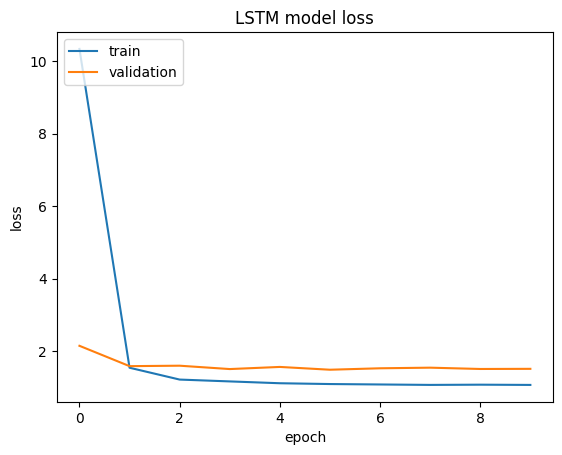

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
stock_selection

[['PKI',
  'WEC',
  'HAL',
  'CI',
  'NEM',
  'KR',
  'BDX',
  'FDX',
  'TTWO',
  'STZ',
  'MO',
  'PXD',
  'CPRT',
  'TSN',
  'EIX',
  'SO',
  'HSY',
  'BALL',
  'SRE',
  'ACGL',
  'CTSH',
  'ARE',
  'YUM',
  'ROP',
  'XEL',
  'STLD',
  'MKC',
  'UNP',
  'EW',
  'XOM'],
 ['PKI',
  'WEC',
  'HAL',
  'CI',
  'NEM',
  'KR',
  'FDX',
  'BDX',
  'TTWO',
  'STZ',
  'MO',
  'PXD',
  'CPRT',
  'TSN',
  'EIX',
  'SO',
  'HSY',
  'BALL',
  'SRE',
  'ACGL',
  'CTSH',
  'YUM',
  'ROP',
  'ARE',
  'XEL',
  'STLD',
  'MKC',
  'UNP',
  'EW',
  'XOM'],
 ['PKI',
  'WEC',
  'HAL',
  'CI',
  'NEM',
  'KR',
  'FDX',
  'BDX',
  'TTWO',
  'STZ',
  'MO',
  'PXD',
  'CPRT',
  'TSN',
  'EIX',
  'SO',
  'HSY',
  'BALL',
  'SRE',
  'ACGL',
  'CTSH',
  'YUM',
  'ROP',
  'ARE',
  'XEL',
  'STLD',
  'MKC',
  'UNP',
  'EW',
  'XOM'],
 ['PKI',
  'WEC',
  'HAL',
  'CI',
  'NEM',
  'KR',
  'FDX',
  'BDX',
  'TTWO',
  'STZ',
  'MO',
  'PXD',
  'CPRT',
  'TSN',
  'EIX',
  'SO',
  'HSY',
  'BALL',
  'SRE',
  'ACGL',
  'C

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/LSTM_Tech_long_123_new.csv",index=True, header=True )

#GRU with Technical Data

In [ ]:
%%time
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=1024, return_sequences=True, input_shape=(x_dataset.shape[1],x_dataset.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(x_dataset.shape[1],x_dataset.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(x_dataset.shape[1],x_dataset.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1024))
# The output layer
regressorGRU.add(Dense(units=512))
# The output layer
regressorGRU.add(Dense(units=500))
# Compiling the RNN
regressorGRU.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/weights_GRU_Techincal.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

# Fitting to the training set
history = regressorGRU.fit(x_train, y_train, shuffle=False, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
19/20 [===========================>..] - ETA: 0s - loss: 917.6290 
Epoch 1: val_loss improved from inf to 30.98263, saving model to /content/drive/My Drive/FYP Data/weights_GRU_Techincal.h5
20/20 [==============================] - 8s 196ms/step - loss: 880.0453 - val_loss: 30.9826 - lr: 0.0100
Epoch 2/10
16/20 [=======================>......] - ETA: 0s - loss: 76.6453
Epoch 2: val_loss improved from 30.98263 to 20.64087, saving model to /content/drive/My Drive/FYP Data/weights_GRU_Techincal.h5
20/20 [==============================] - 1s 37ms/step - loss: 71.1983 - val_loss: 20.6409 - lr: 0.0100
Epoch 3/10
16/20 [=======================>......] - ETA: 0s - loss: 30.2903
Epoch 3: val_loss improved from 20.64087 to 10.73813, saving model to /content/drive/My Drive/FYP Data/weights_GRU_Techincal.h5
20/20 [==============================] - 1s 33ms/step - loss: 26.7685 - val_loss: 10.7381 - lr: 0.0100
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 5.2757
Epoch

In [ ]:
regressorGRU = keras.models.load_model('/content/drive/My Drive/FYP Data/weights_GRU_Techincal.h5')
#Model Evaluation
predictions = regressorGRU.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 1s 997ms/step


0.1801603451050245

In [ ]:
#profit test
test_period = time[n_past+245:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

In [ ]:
stock_selection

[['NI',
  'PTC',
  'ALGN',
  'DPZ',
  'TSCO',
  'EXPD',
  'CL',
  'ROP',
  'WBA',
  'NFLX',
  'ES',
  'IP',
  'AME',
  'VTR',
  'GL',
  'ALL',
  'NKE',
  'HRL',
  'BIO',
  'PXD',
  'CSGP',
  'APA',
  'MO',
  'BWA',
  'ZBH',
  'AOS',
  'SHW',
  'BALL',
  'MSI',
  'TPR'],
 ['NI',
  'PTC',
  'ALGN',
  'DPZ',
  'TSCO',
  'EXPD',
  'CL',
  'ROP',
  'WBA',
  'NFLX',
  'ES',
  'IP',
  'AME',
  'VTR',
  'GL',
  'ALL',
  'NKE',
  'HRL',
  'BIO',
  'PXD',
  'CSGP',
  'APA',
  'MO',
  'BWA',
  'ZBH',
  'AOS',
  'SHW',
  'BALL',
  'MSI',
  'TPR'],
 ['NI',
  'PTC',
  'ALGN',
  'DPZ',
  'TSCO',
  'EXPD',
  'CL',
  'ROP',
  'WBA',
  'NFLX',
  'ES',
  'IP',
  'AME',
  'VTR',
  'GL',
  'ALL',
  'NKE',
  'HRL',
  'BIO',
  'PXD',
  'CSGP',
  'APA',
  'MO',
  'BWA',
  'ZBH',
  'AOS',
  'SHW',
  'BALL',
  'MSI',
  'TPR'],
 ['NI',
  'PTC',
  'ALGN',
  'DPZ',
  'TSCO',
  'EXPD',
  'CL',
  'ROP',
  'WBA',
  'NFLX',
  'ES',
  'IP',
  'AME',
  'VTR',
  'GL',
  'ALL',
  'NKE',
  'HRL',
  'BIO',
  'PXD',
  'CSGP'

In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by GRU with only Technical data is ',trading)
print('The money earned by GRU with only Technical data is %',trading*100/original_money)
print('The money earned by GRU with only Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by GRU with only Technical data is  -296.919810295105
The money earned by GRU with only Technical data is % -6.564027020235213
The money earned by GRU with only Technical data is %(unchange) -6.564027020235213


dict_keys(['loss', 'val_loss', 'lr'])


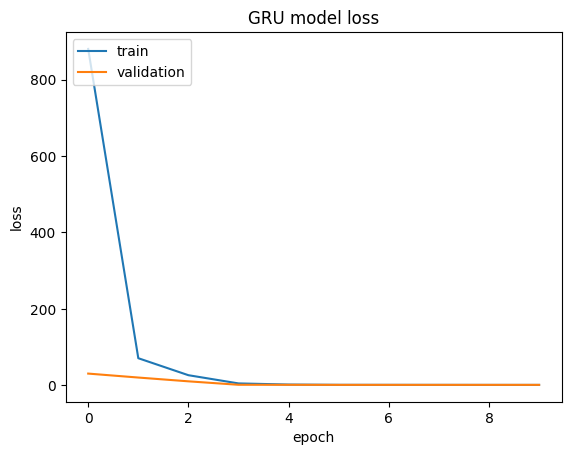

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/GRU_Tech_long_123_new.csv",index=True, header=True )

#Training

In [ ]:
#read data
multi_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor_data_improved.csv",index_col = 0,header = [0,1])
multi_factor_data = multi_factor_data[84:]
multi_factor_data

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2000-01-31        NaN        NaN        NaN        NaN        NaN        NaN   
2000-02-29        NaN        NaN        NaN        NaN        NaN        NaN   
2000-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
2000-04-28        NaN        NaN        NaN        NaN        NaN        NaN   
2000-05-31        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   

                   ZTS                                      ...             \
                  Open        High         Low       Close  ...    peRatio   
Date                                                        ...              
2000-01-31         NaN         NaN         NaN         NaN  ...   0.000000   
2000-02-29         NaN         NaN         NaN         NaN  ...   0.000000   
2000-03-31         NaN         NaN         NaN         NaN  ...   0.000000   
2000-04-28         NaN         NaN         NaN         NaN  ...   0.000000   
2000-05-31         NaN         NaN         NaN         NaN  ...   0.000000   
...                ...         ...         ...         ...  ...        ...   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...  38.179726   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...  32.783583   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...  32.783583   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...  32.783583   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...  37.264629   

                                                                       \
              pbRatio  evToSales receivablesTurnover payablesTurnover   
Date                                                                    
2000-01-31   0.000000   0.000000            0.000000         0.000000   
2000-02-29   0.000000   0.000000            0.000000         0.000000   
2000-03-31   0.000000   0.000000            0.000000         0.000000   
2000-04-28   0.000000   0.000000            0.000000         0.000000   
2000-05-31   0.000000   0.000000            0.000000         0.000000   
...               ...        ...                 ...              ...   
2022-08-31  17.639367  41.361745            1.589466         1.453488   
2022-09-30  14.876702  36.771260            1.683768         1.627346   
2022-10-31  14.876702  36.771260            1.683768         1.627346   
2022-11-30  14.876702  36.771260            1.683768         1.627346   
2022-12-30  15.599541  35.232831            1.679012         1.612346   

                                                                     \
           debtToAssets inventoryTurnover       roe revenuePerShare   
Date                                                                  
2000-01-31     0.000000          0.000000  0.000000        0.000000   
2000-02-29     0.000000          0.000000  0.000000        0.000000   
2000-03-31     0.000000          0.000000  0.000000        0.000000   
2000-04-28     0.000000          0.000000  0.000000        0.000000   
2000-05-31     0.000000          0.000000  0.000000        0.000000   
...                 ...               ...       ...             ...   
2022-08-31     0.667393          0.283447  0.115502        4.365957   
2022-09-30     0.659061          0.263569  0.113446        4.279607   

In [ ]:
multi_factor_data[np.isnan(multi_factor_data)] = 0
#get time list

time = multi_factor_data.index.values
time

array(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
       '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
       '2000-09-29', '2000-10-31', '2000-11-30', '2000-12-29',
       '2001-01-31', '2001-02-28', '2001-03-30', '2001-04-30',
       '2001-05-31', '2001-06-29', '2001-07-31', '2001-08-31',
       '2001-09-28', '2001-10-31', '2001-11-30', '2001-12-31',
       '2002-01-31', '2002-02-28', '2002-03-28', '2002-04-30',
       '2002-05-31', '2002-06-28', '2002-07-31', '2002-08-30',
       '2002-09-30', '2002-10-31', '2002-11-29', '2002-12-31',
       '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
       '2003-05-30', '2003-06-30', '2003-07-31', '2003-08-29',
       '2003-09-30', '2003-10-31', '2003-11-28', '2003-12-31',
       '2004-01-30', '2004-02-27', '2004-03-31', '2004-04-30',
       '2004-05-28', '2004-06-30', '2004-07-30', '2004-08-31',
       '2004-09-30', '2004-10-29', '2004-11-30', '2004-12-31',
       '2005-01-31', '2005-02-28', '2005-03-31', '2005-

In [ ]:
label_df = pd.read_csv("drive/My Drive/FYP Data/Long_label_1234.csv",index_col = 0)
label_df = label_df.reindex(index=label_df.index[::-1])
label_df.reset_index()
label_df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,2,1,3,0,0,1,1,3,2,0,...,0,2,0,2,0,2,3,0,2,0
2000-02-29,1,2,2,0,0,1,1,2,2,0,...,0,3,0,2,0,3,1,0,1,0
2000-03-31,2,3,3,0,0,1,1,3,3,0,...,0,1,0,3,0,3,3,0,2,0
2000-04-28,2,2,3,0,0,2,3,1,2,0,...,0,1,0,2,0,1,1,0,3,0
2000-05-31,2,2,3,0,0,3,1,3,2,0,...,0,1,0,1,0,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1,0,3,3,1,3,2,0,2,2,...,3,1,3,0,3,3,0,3,2,3
2022-09-30,2,2,0,1,2,0,3,2,1,3,...,1,3,0,0,3,2,1,1,0,0
2022-10-31,0,3,2,2,1,0,0,2,2,0,...,3,1,3,2,2,2,0,1,0,0


In [ ]:
# get multifactor list
multifactor_list = Technical_list+fundamental_list

# get x_dataset, y_dataset
multi_factor_data = multi_factor_data.astype(float)
label_df = label_df.astype(float)
x_dataset = []
y_dataset = []
temp = []

for ticker in tqdm(SP500_ticker):
  y_dataset.append(label_df[ticker])
  temp = []
  for factor in multifactor_list:
    temp.append(multi_factor_data[ticker, factor])
  x_dataset.append(temp)
y_dataset = np.array(y_dataset).T
x_dataset = np.array(x_dataset).T

print('y_dataset',y_dataset.shape)
print('x_dataset',x_dataset.shape)

  0%|          | 0/500 [00:00<?, ?it/s]

y_dataset (276, 500)
x_dataset (276, 20, 500)


In [ ]:
train_point = X.shape[0]-21

#Preparation of test set
x_train = x_dataset[0:train_point]
y_train = y_dataset[0:train_point]

x_test = x_dataset[train_point:]
y_test = y_dataset[train_point:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(250, 20, 500)
(250, 500)
(26, 20, 500)
(26, 500)


In [ ]:
n_future = 1   # Number of month we want top predict into the future
n_past = 5  

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_dataset = scaler.fit_transform(x_dataset)
y_dataset = scaler.fit_transform(y_dataset)
x_dataset.shape

(276, 10000)

In [ ]:
#Preparation of training set
X = []
Y = []

for i in range(n_past, len(x_dataset) - n_future +1):
  #print(i)
  X.append(x_dataset[i - n_past:i,:])
Y = y_dataset[n_past:]
X, Y = np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

(271, 5, 10000)
(271, 500)


In [ ]:
train_point = X.shape[0]-26

#Preparation of test set
x_train = X[0:train_point]
y_train = Y[0:train_point]

x_test = X[train_point:]
y_test = Y[train_point:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(245, 5, 10000)
(245, 500)
(26, 5, 10000)
(26, 500)


##LSTM

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=( x_dataset.shape[1], x_dataset.shape[2])))

# Adding 2nd LSTM layer
model.add(LSTM(units=1024, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/LSTM_long_123.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 17.2686
Epoch 1: val_loss improved from inf to 4.24114, saving model to /content/drive/My Drive/FYP Data/model/LSTM_long_123.h5
20/20 [==============================] - 8s 285ms/step - loss: 17.2686 - val_loss: 4.2411 - lr: 0.0100
Epoch 2/10
18/20 [==========================>...] - ETA: 0s - loss: 4.4939
Epoch 2: val_loss improved from 4.24114 to 1.95563, saving model to /content/drive/My Drive/FYP Data/model/LSTM_long_123.h5
20/20 [==============================] - 1s 60ms/step - loss: 4.3382 - val_loss: 1.9556 - lr: 0.0100
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 1.6538
Epoch 3: val_loss did not improve from 1.95563
20/20 [==============================] - 1s 31ms/step - loss: 1.6538 - val_loss: 2.0424 - lr: 0.0100
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 1.4846
Epoch 4: val_loss improved from 1.95563 to 1.51674, saving model to /content/drive/My Drive/FYP Data/mo

In [ ]:
#Model Evaluation
predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+245:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

#trading simulate
original_money = 0
trading = 0
test_period = time[n_past+245:]
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

1/1 [==============================] - 0s 22ms/step
rmse 0.08685911366028282
The money earned by LSTM with Fundamental and Technical data is  578.7831239700317
The money earned by LSTM with Fundamental and Technical data is % 5.63520894940951
The money earned by LSTM with Fundamental and Technical data is %(unchange) 5.63520894940951


In [ ]:
stock_selection

[['CMS',
  'VTRS',
  'STZ',
  'OKE',
  'EVRG',
  'AMZN',
  'MGM',
  'NFLX',
  'APH',
  'CVS',
  'WAB',
  'SWK',
  'PWR',
  'NTAP',
  'KLAC',
  'FICO',
  'IDXX',
  'TXN',
  'DHI',
  'VLO',
  'REGN',
  'MCO',
  'NVR',
  'HPQ',
  'TMO',
  'FFIV',
  'SRE',
  'ADBE',
  'ALGN',
  'EQIX'],
 ['CMS',
  'VTRS',
  'STZ',
  'AMZN',
  'EVRG',
  'NFLX',
  'MGM',
  'OKE',
  'APH',
  'CVS',
  'WAB',
  'SWK',
  'PWR',
  'FICO',
  'NTAP',
  'KLAC',
  'TXN',
  'DHI',
  'IDXX',
  'VLO',
  'REGN',
  'MCO',
  'NVR',
  'TMO',
  'HPQ',
  'FFIV',
  'SRE',
  'ADBE',
  'ALGN',
  'EQIX'],
 ['CMS',
  'VTRS',
  'STZ',
  'AMZN',
  'EVRG',
  'NFLX',
  'MGM',
  'OKE',
  'APH',
  'CVS',
  'WAB',
  'SWK',
  'PWR',
  'FICO',
  'NTAP',
  'KLAC',
  'TXN',
  'DHI',
  'IDXX',
  'VLO',
  'REGN',
  'MCO',
  'NVR',
  'TMO',
  'HPQ',
  'FFIV',
  'SRE',
  'ADBE',
  'ALGN',
  'EQIX'],
 ['CMS',
  'VTRS',
  'STZ',
  'AMZN',
  'EVRG',
  'NFLX',
  'MGM',
  'OKE',
  'APH',
  'CVS',
  'WAB',
  'SWK',
  'PWR',
  'FICO',
  'NTAP',
  'KLAC

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/LSTM_TF_long_123_new.csv",index=True, header=True )

##GRU

In [ ]:
%%time
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=1024, return_sequences=True, input_shape=(x_dataset.shape[1], x_dataset.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(x_dataset.shape[1], x_dataset.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True, input_shape=(x_dataset.shape[1], x_dataset.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=500))
# Compiling the RNN
regressorGRU.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/GRU_long_123.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

# Fitting to the training set
history = regressorGRU.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
18/20 [==========================>...] - ETA: 0s - loss: 2.8994
Epoch 1: val_loss improved from inf to 1.73182, saving model to /content/drive/My Drive/FYP Data/model/GRU_long_123.h5
20/20 [==============================] - 10s 280ms/step - loss: 2.7733 - val_loss: 1.7318 - lr: 0.0100
Epoch 2/10
17/20 [========================>.....] - ETA: 0s - loss: 1.4803
Epoch 2: val_loss improved from 1.73182 to 1.65950, saving model to /content/drive/My Drive/FYP Data/model/GRU_long_123.h5
20/20 [==============================] - 1s 42ms/step - loss: 1.4947 - val_loss: 1.6595 - lr: 0.0100
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 1.4747
Epoch 3: val_loss improved from 1.65950 to 1.56037, saving model to /content/drive/My Drive/FYP Data/model/GRU_long_123.h5
20/20 [==============================] - 1s 37ms/step - loss: 1.4747 - val_loss: 1.5604 - lr: 0.0100
Epoch 4/10
17/20 [========================>.....] - ETA: 0s - loss: 1.4122
Epoch 4: val_loss did not impr

In [ ]:
#Model Evaluation
predictions = regressorGRU.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+245:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

1/1 [==============================] - 0s 22ms/step
rmse 0.06860474990895735


In [ ]:
stock_selection

[['FFIV',
  'EA',
  'BLK',
  'YUM',
  'BALL',
  'ETN',
  'RCL',
  'ETR',
  'TECH',
  'PHM',
  'TSN',
  'EQIX',
  'MCO',
  'SYK',
  'MRO',
  'ATVI',
  'JBHT',
  'ZBRA',
  'AZO',
  'AME',
  'TMO',
  'PKI',
  'CAG',
  'ISRG',
  'MHK',
  'GL',
  'INCY',
  'ALGN',
  'CRL',
  'GPN'],
 ['FFIV',
  'EA',
  'BLK',
  'YUM',
  'BALL',
  'ETN',
  'RCL',
  'ETR',
  'TECH',
  'PHM',
  'TSN',
  'EQIX',
  'MCO',
  'SYK',
  'MRO',
  'ATVI',
  'JBHT',
  'ZBRA',
  'AZO',
  'AME',
  'TMO',
  'PKI',
  'CAG',
  'ISRG',
  'MHK',
  'GL',
  'INCY',
  'ALGN',
  'CRL',
  'GPN'],
 ['FFIV',
  'EA',
  'BLK',
  'YUM',
  'BALL',
  'ETN',
  'RCL',
  'ETR',
  'TECH',
  'PHM',
  'TSN',
  'EQIX',
  'MCO',
  'SYK',
  'MRO',
  'ATVI',
  'JBHT',
  'ZBRA',
  'AZO',
  'AME',
  'TMO',
  'PKI',
  'CAG',
  'ISRG',
  'MHK',
  'GL',
  'INCY',
  'ALGN',
  'CRL',
  'GPN'],
 ['FFIV',
  'EA',
  'BLK',
  'YUM',
  'BALL',
  'ETN',
  'RCL',
  'ETR',
  'TECH',
  'PHM',
  'TSN',
  'EQIX',
  'MCO',
  'SYK',
  'MRO',
  'ATVI',
  'JBHT',
  'ZB

In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with Fundamental and Technical data is  963.6957950592041
The money earned by LSTM with Fundamental and Technical data is % 14.08091794184479
The money earned by LSTM with Fundamental and Technical data is %(unchange) 14.08091794184479


In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/GRU_TF_long_123_new.csv",index=True, header=True )

#original one with all fundamental data

In [ ]:
#read data
multi_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor.csv",index_col = 0,header = [0,1])

for ticker in tqdm(SP500_ticker):
  if ticker in ['BRK.B','BF.B','GEHC']:
    continue
  key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")
  key_metrics_quarterly= key_metrics_quarterly.T
  #key_metrics_quarterly = key_metrics_quarterly.drop(columns=['period'])
  key_metrics_quarterly_new = pd.DataFrame(np.repeat(key_metrics_quarterly.values,3,axis=0))
  key_metrics_quarterly_new.columns = key_metrics_quarterly.columns
  fundamental = key_metrics_quarterly_new.tail(-2)
  fundamental = fundamental.reset_index(drop=True)
  fundamental = fundamental.reindex(range(360)).fillna(0)
  fundamental = fundamental.reindex(index=fundamental.index[::-1])
  fundamental.index = label_df.index
  for fu in fundamental_list:
    multi_factor_data[ticker, fu] = fundamental[fu]

multi_factor_data = multi_factor_data.drop('BRK.B', axis=1)
multi_factor_data = multi_factor_data.drop('BF.B', axis=1)
multi_factor_data = multi_factor_data.drop('GEHC', axis=1)

multi_factor_data.to_csv("drive/My Drive/FYP Data/multi_factor_data.csv",index=True, header=True )


In [ ]:
#read data
multi_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor_data.csv",index_col = 0,header = [0,1])
multi_factor_data

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
1993-02-26 00:00:00-05:00   0.000000   0.000000   0.000000   0.000000   
1993-03-31 00:00:00-05:00   0.000000   0.000000   0.000000   0.000000   
1993-04-30 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
1993-05-28 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
1993-06-30 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
...                              ...        ...        ...        ...   
2022-08-31 00:00:00-04:00  28.950001  29.299999  28.370001  28.420000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
1993-02-26 00:00:00-05:00   0.000000        0.0    5.375000    5.375000   
1993-03-31 00:00:00-05:00   0.000000        0.0    4.750000    4.875000   
1993-04-30 00:00:00-04:00   0.000000        0.0    5.000000    5.125000   
1993-05-28 00:00:00-04:00   0.000000        0.0    5.312500    5.312500   
1993-06-30 00:00:00-04:00   0.000000        0.0    5.125000    5.125000   
...                              ...        ...         ...         ...   
2022-08-31 00:00:00-04:00  28.232733  5695500.0  175.630005  175.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   

                                                   ...             ZTS  \
                                  Low       Close  ... averagePayables   
Date                                               ...                   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...             NaN   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...             NaN   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...             NaN   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...             NaN   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...             NaN   
...                               ...         ...  ...             ...   
2022-08-31 00:00:00-04:00  172.460007  174.020004  ...             NaN   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...             NaN   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...             NaN   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...             NaN   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...             NaN   

                                                                 \
                          averageInventory daysSalesOutstanding   
Date                                                              
1993-02-26 00:00:00-05:00              NaN                  NaN   
1993-03-31 00:00:00-05:00              NaN                  NaN   
1993-04-30 00:00:00-04:00              NaN                  NaN   
1993-05-28 00:00:00-04:00              NaN                  NaN   
1993-06-30 00:00:00-04:00              NaN                  NaN   
...                                    ...                  ...   
2022-08-31 00:00:00-04:00              NaN                  NaN   
2022-09-30 00:00:00-04:00              NaN                  NaN   
2022-10-31 00:00:00-04:00              NaN                  NaN   
2022-11-30 00:00:00-05:00              NaN                  NaN   
2022-12-30 00:00:00-05:00              NaN        

# LSTM

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1])))

# Adding 2nd LSTM layer
model.add(LSTM(units=1024, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/weights_w_fundamental.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=15, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/15
19/20 [===========================>..] - ETA: 0s - loss: 10.2242
Epoch 1: val_loss improved from inf to 0.73654, saving model to /content/drive/My Drive/FYP Data/weights_w_fundamental.h5
20/20 [==============================] - 7s 203ms/step - loss: 9.9651 - val_loss: 0.7365 - lr: 0.0100
Epoch 2/15
19/20 [===========================>..] - ETA: 0s - loss: 1.0817
Epoch 2: val_loss improved from 0.73654 to 0.21913, saving model to /content/drive/My Drive/FYP Data/weights_w_fundamental.h5
20/20 [==============================] - 1s 74ms/step - loss: 1.0715 - val_loss: 0.2191 - lr: 0.0100
Epoch 3/15
19/20 [===========================>..] - ETA: 0s - loss: 0.5963
Epoch 3: val_loss did not improve from 0.21913
20/20 [==============================] - 1s 36ms/step - loss: 0.5858 - val_loss: 0.5226 - lr: 0.0100
Epoch 4/15
19/20 [===========================>..] - ETA: 0s - loss: 0.4623
Epoch 4: val_loss did not improve from 0.21913
20/20 [==============================] - 1s 37ms/step

dict_keys(['loss', 'val_loss', 'lr'])


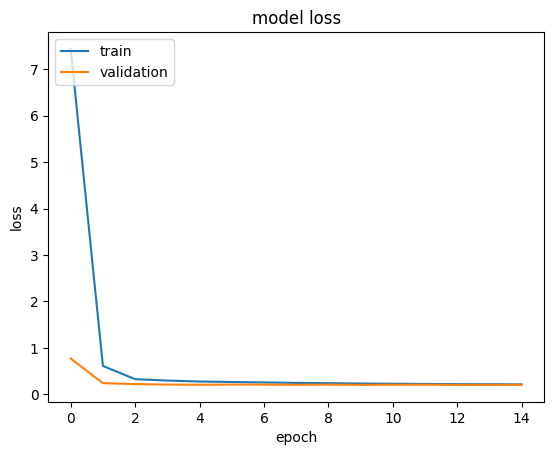

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Model Evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+325:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

1/1 [==============================] - 0s 27ms/step


0.009829873807871571

In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with Fundamental and Technical data is  -30.203195571899414
The money earned by LSTM with Fundamental and Technical data is % -0.4763363847814673
The money earned by LSTM with Fundamental and Technical data is %(unchange) -0.4763363847814673


In [ ]:
stock_selection

[['BWA',
  'EMN',
  'UNH',
  'URI',
  'TXT',
  'FMC',
  'EIX',
  'AMZN',
  'BBWI',
  'BKNG',
  'ARE',
  'ADBE',
  'CSGP',
  'FFIV',
  'SWKS',
  'CI',
  'VFC',
  'ODFL',
  'MCO',
  'CTSH',
  'JBHT',
  'ROST',
  'CPRT',
  'WYNN',
  'MTCH',
  'MNST',
  'VTR',
  'AMT',
  'CTRA',
  'TYL'],
 ['BWA',
  'EMN',
  'UNH',
  'URI',
  'TXT',
  'FMC',
  'EIX',
  'AMZN',
  'BBWI',
  'BKNG',
  'ARE',
  'ADBE',
  'CSGP',
  'FFIV',
  'SWKS',
  'CI',
  'VFC',
  'ODFL',
  'MCO',
  'CTSH',
  'JBHT',
  'ROST',
  'CPRT',
  'WYNN',
  'MTCH',
  'MNST',
  'VTR',
  'AMT',
  'CTRA',
  'TYL'],
 ['BWA',
  'EMN',
  'UNH',
  'URI',
  'TXT',
  'FMC',
  'EIX',
  'AMZN',
  'BBWI',
  'BKNG',
  'ARE',
  'ADBE',
  'CSGP',
  'FFIV',
  'SWKS',
  'CI',
  'VFC',
  'ODFL',
  'MCO',
  'CTSH',
  'JBHT',
  'ROST',
  'CPRT',
  'WYNN',
  'MTCH',
  'MNST',
  'VTR',
  'AMT',
  'CTRA',
  'TYL'],
 ['BWA',
  'EMN',
  'UNH',
  'URI',
  'TXT',
  'FMC',
  'EIX',
  'AMZN',
  'BBWI',
  'BKNG',
  'ARE',
  'ADBE',
  'CSGP',
  'FFIV',
  'SWKS',


# GRU

In [ ]:
%%time
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=500))
# Compiling the RNN
regressorGRU.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/weights_GRU.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

# Fitting to the training set
history = regressorGRU.fit(x_train, y_train, shuffle=True, epochs=15, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/15
24/26 [==========================>...] - ETA: 0s - loss: 0.8176
Epoch 1: val_loss improved from inf to 0.26238, saving model to weights_GRU.h5
26/26 [==============================] - 6s 68ms/step - loss: 0.7818 - val_loss: 0.2624 - lr: 0.0100
Epoch 2/15
25/26 [===========================>..] - ETA: 0s - loss: 0.3403
Epoch 2: val_loss improved from 0.26238 to 0.25451, saving model to weights_GRU.h5
26/26 [==============================] - 1s 30ms/step - loss: 0.3398 - val_loss: 0.2545 - lr: 0.0100
Epoch 3/15
26/26 [==============================] - ETA: 0s - loss: 0.3233
Epoch 3: val_loss improved from 0.25451 to 0.25248, saving model to weights_GRU.h5
26/26 [==============================] - 1s 30ms/step - loss: 0.3233 - val_loss: 0.2525 - lr: 0.0100
Epoch 4/15
24/26 [==========================>...] - ETA: 0s - loss: 0.3050
Epoch 4: val_loss improved from 0.25248 to 0.24879, saving model to weights_GRU.h5
26/26 [==============================] - 1s 30ms/step - loss: 0.3037 

In [ ]:
#Model Evaluation
predictions = regressorGRU.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 0s 22ms/step


NotFittedError: ignored

In [ ]:
#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with Fundamental and Technical data is  301.037314414978
The money earned by LSTM with Fundamental and Technical data is % 8.04436665883254
The money earned by LSTM with Fundamental and Technical data is %(unchange) 8.04436665883254


dict_keys(['loss', 'val_loss', 'lr'])


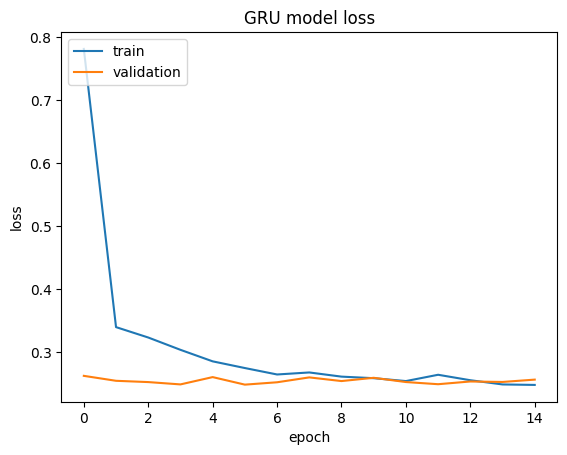

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Rolling strategies

##GRU

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/GRU_long_fintune_123.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
predictions = []

for i in tqdm(range(26)):
  if i == 0:
    GRU_model = keras.models.load_model('/content/drive/My Drive/FYP Data/model/GRU_long_123.h5')
  else:
    GRU_model = keras.models.load_model('/content/drive/My Drive/FYP Data/model/GRU_long_fintune_123.h5')
  prediction = GRU_model.predict(x_test[i:i+1])
  predictions.append(prediction)
  x_train = x_dataset[i:train_point+i]
  y_train = y_dataset[i:train_point+i]

  #fintune model
  history = GRU_model.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

predictions = np.vstack([predictions[i] for i in range(26)])
#Model Evaluation
#predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+train_point:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by GRU with Fundamental and Technical data is ',trading)
print('The money earned by GRU with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by GRU with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)


  0%|          | 0/26 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step
Epoch 1/10
17/20 [========================>.....] - ETA: 0s - loss: 1.4592
Epoch 1: val_loss improved from inf to 1.67061, saving model to /content/drive/My Drive/FYP Data/model/GRU_long_fintune_123.h5
20/20 [==============================] - 4s 102ms/step - loss: 1.4644 - val_loss: 1.6706 - lr: 0.0100
Epoch 2/10
17/20 [========================>.....] - ETA: 0s - loss: 1.4546
Epoch 2: val_loss did not improve from 1.67061
20/20 [==============================] - 0s 19ms/step - loss: 1.4582 - val_loss: 1.7021 - lr: 0.0100
Epoch 3/10
17/20 [========================>.....] - ETA: 0s - loss: 1.4555
Epoch 3: val_loss did not improve from 1.67061
20/20 [==============================] - 0s 19ms/step - loss: 1.4543 - val_loss: 2.0432 - lr: 0.0100
Epoch 4/10
17/20 [========================>.....] - ETA: 0s - loss: 1.4409
Epoch 4: val_loss did not improve from 1.67061
20/20 [==============================] - 0s 19ms/step - loss: 1.4373 - val_los

In [ ]:
stock_selection

[['TAP',
  'FDS',
  'MGM',
  'MOS',
  'ADI',
  'IEX',
  'AMD',
  'NI',
  'MTCH',
  'CHRW',
  'LMT',
  'LRCX',
  'FRT',
  'DLTR',
  'DHI',
  'NEE',
  'F',
  'COP',
  'MO',
  'UDR',
  'AJG',
  'ATVI',
  'EW',
  'HD',
  'PKI',
  'TECH',
  'TRMB',
  'LHX',
  'TTWO',
  'AIG'],
 ['WBA',
  'MMC',
  'OKE',
  'ATO',
  'NEE',
  'MAA',
  'FRT',
  'K',
  'ROST',
  'MCHP',
  'BXP',
  'DLR',
  'PSA',
  'IRM',
  'C',
  'GPC',
  'INTU',
  'CNC',
  'TSCO',
  'UDR',
  'REG',
  'KR',
  'BBWI',
  'PEG',
  'WAB',
  'VFC',
  'IFF',
  'PGR',
  'CMCSA',
  'SPG'],
 ['MHK',
  'STE',
  'REGN',
  'CHD',
  'AMD',
  'WAT',
  'ODFL',
  'WYNN',
  'NKE',
  'KR',
  'PNR',
  'BKR',
  'AOS',
  'SNPS',
  'TSCO',
  'AVB',
  'CTRA',
  'SWKS',
  'CAG',
  'MTCH',
  'CNC',
  'CTSH',
  'BIIB',
  'SHW',
  'APH',
  'TMO',
  'ADI',
  'ROST',
  'AZO',
  'HAS'],
 ['MHK',
  'STE',
  'REGN',
  'CHD',
  'AMD',
  'WAT',
  'ODFL',
  'WYNN',
  'NKE',
  'KR',
  'PNR',
  'BKR',
  'AOS',
  'SNPS',
  'TSCO',
  'AVB',
  'CTRA',
  'SWKS',
  'CA

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/GRU_TF_long_rolling_123_new.csv",index=True, header=True )

##LSTM

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/LSTM_rolling_long_1234.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
predictions = []

for i in tqdm(range(26)):
  if i == 0:
    LSTM_model = keras.models.load_model('/content/drive/My Drive/FYP Data/model/LSTM_long_123.h5')
  else:
    LSTM_model = keras.models.load_model('/content/drive/My Drive/FYP Data/model/LSTM_rolling_long_1234.h5')
  prediction = LSTM_model.predict(x_test[i:i+1])
  predictions.append(prediction)
  x_train = x_dataset[i:train_point+i]
  y_train = y_dataset[i:train_point+i]

  #fintune model
  history = LSTM_model.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)



  0%|          | 0/26 [00:00<?, ?it/s]

1/1 [==============================] - 1s 578ms/step
Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.1279
Epoch 1: val_loss improved from inf to 1.44988, saving model to /content/drive/My Drive/FYP Data/model/LSTM_rolling_long_1234.h5
20/20 [==============================] - 8s 342ms/step - loss: 1.1279 - val_loss: 1.4499 - lr: 0.0100
Epoch 2/10
19/20 [===========================>..] - ETA: 0s - loss: 1.1282
Epoch 2: val_loss improved from 1.44988 to 1.42704, saving model to /content/drive/My Drive/FYP Data/model/LSTM_rolling_long_1234.h5
20/20 [==============================] - 1s 51ms/step - loss: 1.1260 - val_loss: 1.4270 - lr: 0.0100
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 1.1030
Epoch 3: val_loss did not improve from 1.42704
20/20 [==============================] - 0s 23ms/step - loss: 1.0986 - val_loss: 1.5071 - lr: 0.0100
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 1.0960
Epoch 4: val_loss improved from 1.

In [ ]:
predictions = np.vstack([predictions[i] for i in range(26)])
#Model Evaluation
#predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+train_point:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)


rmse 0.04123566888845884
The money earned by LSTM with Fundamental and Technical data is  -5697.271071434021
The money earned by LSTM with Fundamental and Technical data is % -47.54179265008586
The money earned by LSTM with Fundamental and Technical data is %(unchange) -47.54179265008586


In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/LSTM_TF_long_rolling_123.csv",index=True, header=True )

# New data preprocessing

In [ ]:
label_df = pd.read_csv("drive/My Drive/FYP Data/Long_label_1234.csv",index_col = 0)
label_df = label_df.reindex(index=label_df.index[::-1])
label_df.reset_index()
label_df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,2,1,3,0,0,1,1,3,2,0,...,0,2,0,2,0,2,3,0,2,0
2000-02-29,1,2,2,0,0,1,1,2,2,0,...,0,3,0,2,0,3,1,0,1,0
2000-03-31,2,3,3,0,0,1,1,3,3,0,...,0,1,0,3,0,3,3,0,2,0
2000-04-28,2,2,3,0,0,2,3,1,2,0,...,0,1,0,2,0,1,1,0,3,0
2000-05-31,2,2,3,0,0,3,1,3,2,0,...,0,1,0,1,0,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1,0,3,3,1,3,2,0,2,2,...,3,1,3,0,3,3,0,3,2,3
2022-09-30,2,2,0,1,2,0,3,2,1,3,...,1,3,0,0,3,2,1,1,0,0
2022-10-31,0,3,2,2,1,0,0,2,2,0,...,3,1,3,2,2,2,0,1,0,0


In [ ]:
multi_factor = pd.read_csv("drive/My Drive/FYP Data/stock data month.csv",index_col = 0,header = [0,1])
multi_factor = multi_factor.reindex(index=multi_factor.index[::-1])
multi_factor.reset_index()
multi_factor = multi_factor.drop(index='2023-01-31')
multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)
multi_factor = multi_factor[84:]
multi_factor

<ipython-input-98-5f3361fcc5b5>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)


FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2000-01-31        NaN        NaN        NaN        NaN        NaN        NaN   
2000-02-29        NaN        NaN        NaN        NaN        NaN        NaN   
2000-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
2000-04-28        NaN        NaN        NaN        NaN        NaN        NaN   
2000-05-31        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   

                   ZTS                                      ...   WTW   GWW  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2000-01-31         NaN         NaN         NaN         NaN  ...  1.00  0.44   
2000-02-29         NaN         NaN         NaN         NaN  ...  1.00  1.00   
2000-03-31         NaN         NaN         NaN         NaN  ...  1.00  0.40   
2000-04-28         NaN         NaN         NaN         NaN  ...  1.00  0.88   
2000-05-31         NaN         NaN         NaN         NaN  ...  1.00  1.00   
...                ...         ...         ...         ...  ...   ...   ...   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...  0.08  0.04   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...  0.84  0.92   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...  0.56  0.08   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...  0.12  0.04   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...  0.20  0.68   

            WYNN   XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
              AD    AD    AD    AD    AD    AD    AD    AD  
Date                                                        
2000-01-31  1.00  0.28  1.00  1.00  0.32  1.00  0.56  1.00  
2000-02-29  1.00  0.96  1.00  1.00  0.84  1.00  0.84  1.00  
2000-03-31  1.00  0.40  1.00  0.08  0.64  1.00  0.24  1.00  
2000-04-28  1.00  0.08  1.00  0.04  0.36  1.00  0.24  1.00  
2000-05-31  1.00  0.04  1.00  1.00  0.88  1.00  0.48  1.00  
...          ...   ...   ...   ...   ...   ...   ...   ...  
2022-08-31  1.00  0.04  0.04  1.00  1.00  0.96  0.04  1.00  
2022-09-30  0.32  1.00  0.92  0.96  1.00  0.88  1.00  0.92  
2022-10-31  0.84  0.56  0.56  0.56  0.48  0.80  0.80  0.56  
2022-11-30  0.16  0.04  0.04  0.04  0.36  0.36  0.32  0.32  
2022-12-30  0.08  0.16  0.84  0.04  0.84  0.04  0.72  0.76  

[276 rows x 6500 columns]

In [ ]:
multi_factor_data[np.isnan(multi_factor_data)] = 0
#get time list

time = multi_factor_data.index.values
time

array(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
       '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
       '2000-09-29', '2000-10-31', '2000-11-30', '2000-12-29',
       '2001-01-31', '2001-02-28', '2001-03-30', '2001-04-30',
       '2001-05-31', '2001-06-29', '2001-07-31', '2001-08-31',
       '2001-09-28', '2001-10-31', '2001-11-30', '2001-12-31',
       '2002-01-31', '2002-02-28', '2002-03-28', '2002-04-30',
       '2002-05-31', '2002-06-28', '2002-07-31', '2002-08-30',
       '2002-09-30', '2002-10-31', '2002-11-29', '2002-12-31',
       '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
       '2003-05-30', '2003-06-30', '2003-07-31', '2003-08-29',
       '2003-09-30', '2003-10-31', '2003-11-28', '2003-12-31',
       '2004-01-30', '2004-02-27', '2004-03-31', '2004-04-30',
       '2004-05-28', '2004-06-30', '2004-07-30', '2004-08-31',
       '2004-09-30', '2004-10-29', '2004-11-30', '2004-12-31',
       '2005-01-31', '2005-02-28', '2005-03-31', '2005-

In [ ]:
multi_factor_data['MMM']

,Open,High,Low,Close,Adj Close,Volume,VEMA12,VSTD20,V20,AR,...,peRatio,pbRatio,evToSales,receivablesTurnover,payablesTurnover,debtToAssets,inventoryTurnover,roe,revenuePerShare,cashPerShare
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,46.125000,48.687500,46.031250,46.812500,25.322666,3282800.0,3.396133e+06,1.258872e+06,0.068587,154.302103,...,21.917166,6.189360,10.228160,1.448164,2.231151,0.520725,1.107882,0.070599,5.057833,0.554438
2000-02-29,42.656250,44.593750,42.312500,44.093750,24.006483,2765400.0,3.420850e+06,5.943768e+05,0.044478,91.292517,...,21.917166,6.189360,10.228160,1.448164,2.231151,0.520725,1.107882,0.070599,5.057833,0.554438
2000-03-31,45.187500,46.000000,44.281250,44.281250,24.108566,2459200.0,3.777333e+06,1.112069e+06,0.100248,174.311927,...,18.080753,5.627306,9.267104,1.441993,2.302846,0.551936,1.075463,0.077808,5.094292,0.346995
2000-04-28,43.718750,43.781250,43.000000,43.312500,23.581133,2947000.0,4.087617e+06,1.923669e+06,0.106520,108.888889,...,18.080753,5.627306,9.267104,1.441993,2.302846,0.551936,1.075463,0.077808,5.094292,0.346995
2000-05-31,43.062500,43.656250,42.875000,42.875000,23.494240,2137000.0,2.381167e+06,6.184604e+05,0.030176,71.906841,...,18.080753,5.627306,9.267104,1.441993,2.302846,0.551936,1.075463,0.077808,5.094292,0.346995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,124.849998,126.459999,123.610001,124.349998,121.304688,31642100.0,2.258349e+07,1.616253e+07,0.040454,71.351134,...,236.836891,5.377173,10.145611,1.770859,1.556065,0.697243,0.902214,0.005676,15.239930,5.225919
2022-09-30,112.000000,113.150002,110.389999,110.500000,107.793869,3112800.0,3.815517e+06,1.095232e+07,0.014331,55.208111,...,4.071806,4.463949,8.813598,1.825286,1.543585,0.693434,0.842030,0.274077,15.152954,6.309775
2022-10-31,126.099998,126.449997,125.360001,125.790001,122.709427,4326200.0,3.581908e+06,8.146275e+05,0.029522,150.489714,...,4.071806,4.463949,8.813598,1.825286,1.543585,0.693434,0.842030,0.274077,15.152954,6.309775


In [ ]:
# get multifactor list
multifactor_list = Technical_list+fundamental_list

# get x_dataset, y_dataset
multi_factor_data = multi_factor_data.astype(float)
label_df = label_df.astype(float)
x_dataset = []
y_dataset = []
multi_factor_ticker = []

for ticker in tqdm(SP500_ticker):
  y_dataset.append(label_df[ticker])
  #print(ticker)
  for factor in multifactor_list:
    multi_factor_ticker.append(multi_factor_data[ticker, factor])

y_dataset = np.array(y_dataset).T
x_dataset = np.array(x_dataset).T

print('y_dataset',y_dataset.shape)
print('x_dataset',x_dataset.shape)

  0%|          | 0/500 [00:00<?, ?it/s]

y_dataset (276, 500)
x_dataset (276, 10000)


In [ ]:
x_dataset[0]

array([4.68125000e+01, 3.28280000e+06, 3.39613333e+06, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_dataset = scaler.fit_transform(x_dataset)
y_dataset = scaler.fit_transform(y_dataset)
x_dataset.shape

In [ ]:
#Preparation of training set
X = []
Y = []

for i in range(n_past, len(x_dataset) - n_future +1):
  #print(i)
  X.append(x_dataset[i - n_past:i,:])
Y = y_dataset[n_past:]
X, Y = np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

In [ ]:
train_point = X.shape[0]-26

#Preparation of test set
x_train = X[0:train_point]
y_train = Y[0:train_point]

x_test = X[train_point:]
y_test = Y[train_point:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)